In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Step #1: Read in our data
df = pd.read_csv("Advertising.csv")

In [3]:
X = df.drop('sales',axis=1)
y = df['sales']

In [4]:
from sklearn.preprocessing import PolynomialFeatures

In [5]:
polynomial_converter = PolynomialFeatures(degree=3,
                                          include_bias=False)
poly_features = polynomial_converter.fit_transform(X)

In [6]:
poly_features[0]

array([2.30100000e+02, 3.78000000e+01, 6.92000000e+01, 5.29460100e+04,
       8.69778000e+03, 1.59229200e+04, 1.42884000e+03, 2.61576000e+03,
       4.78864000e+03, 1.21828769e+07, 2.00135918e+06, 3.66386389e+06,
       3.28776084e+05, 6.01886376e+05, 1.10186606e+06, 5.40101520e+04,
       9.88757280e+04, 1.81010592e+05, 3.31373888e+05])

In [7]:
# [TV | Radio | Newspaper | TV^2 |
#  TV * Radio | TV * Newspaper | Radio^2 | Radio * Newspaper |
#  Newspaper^2 | TV^3 | TV^2 * Radio]

In [8]:
poly_features[0][:3]**3

array([12182876.901,    54010.152,   331373.888])

In [9]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [10]:
X = df[['TV', 'radio', 'newspaper']]  
y = df['sales']                        

degrees = [2, 3, 4]
performance_metrics = {'Degree': [], 'MSE': [], 'R2': []}

for degree in degrees:
    
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = poly.fit_transform(X)

    
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=101)

    
    model = LinearRegression()
    model.fit(X_train, y_train)

    
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    
    performance_metrics['Degree'].append(degree)
    performance_metrics['MSE'].append(mse)
    performance_metrics['R2'].append(r2)

performance_df = pd.DataFrame(performance_metrics)
performance_df

,Degree,MSE,R2
0,2,0.441751,0.984353
1,3,0.336781,0.988071
2,4,0.257835,0.990867


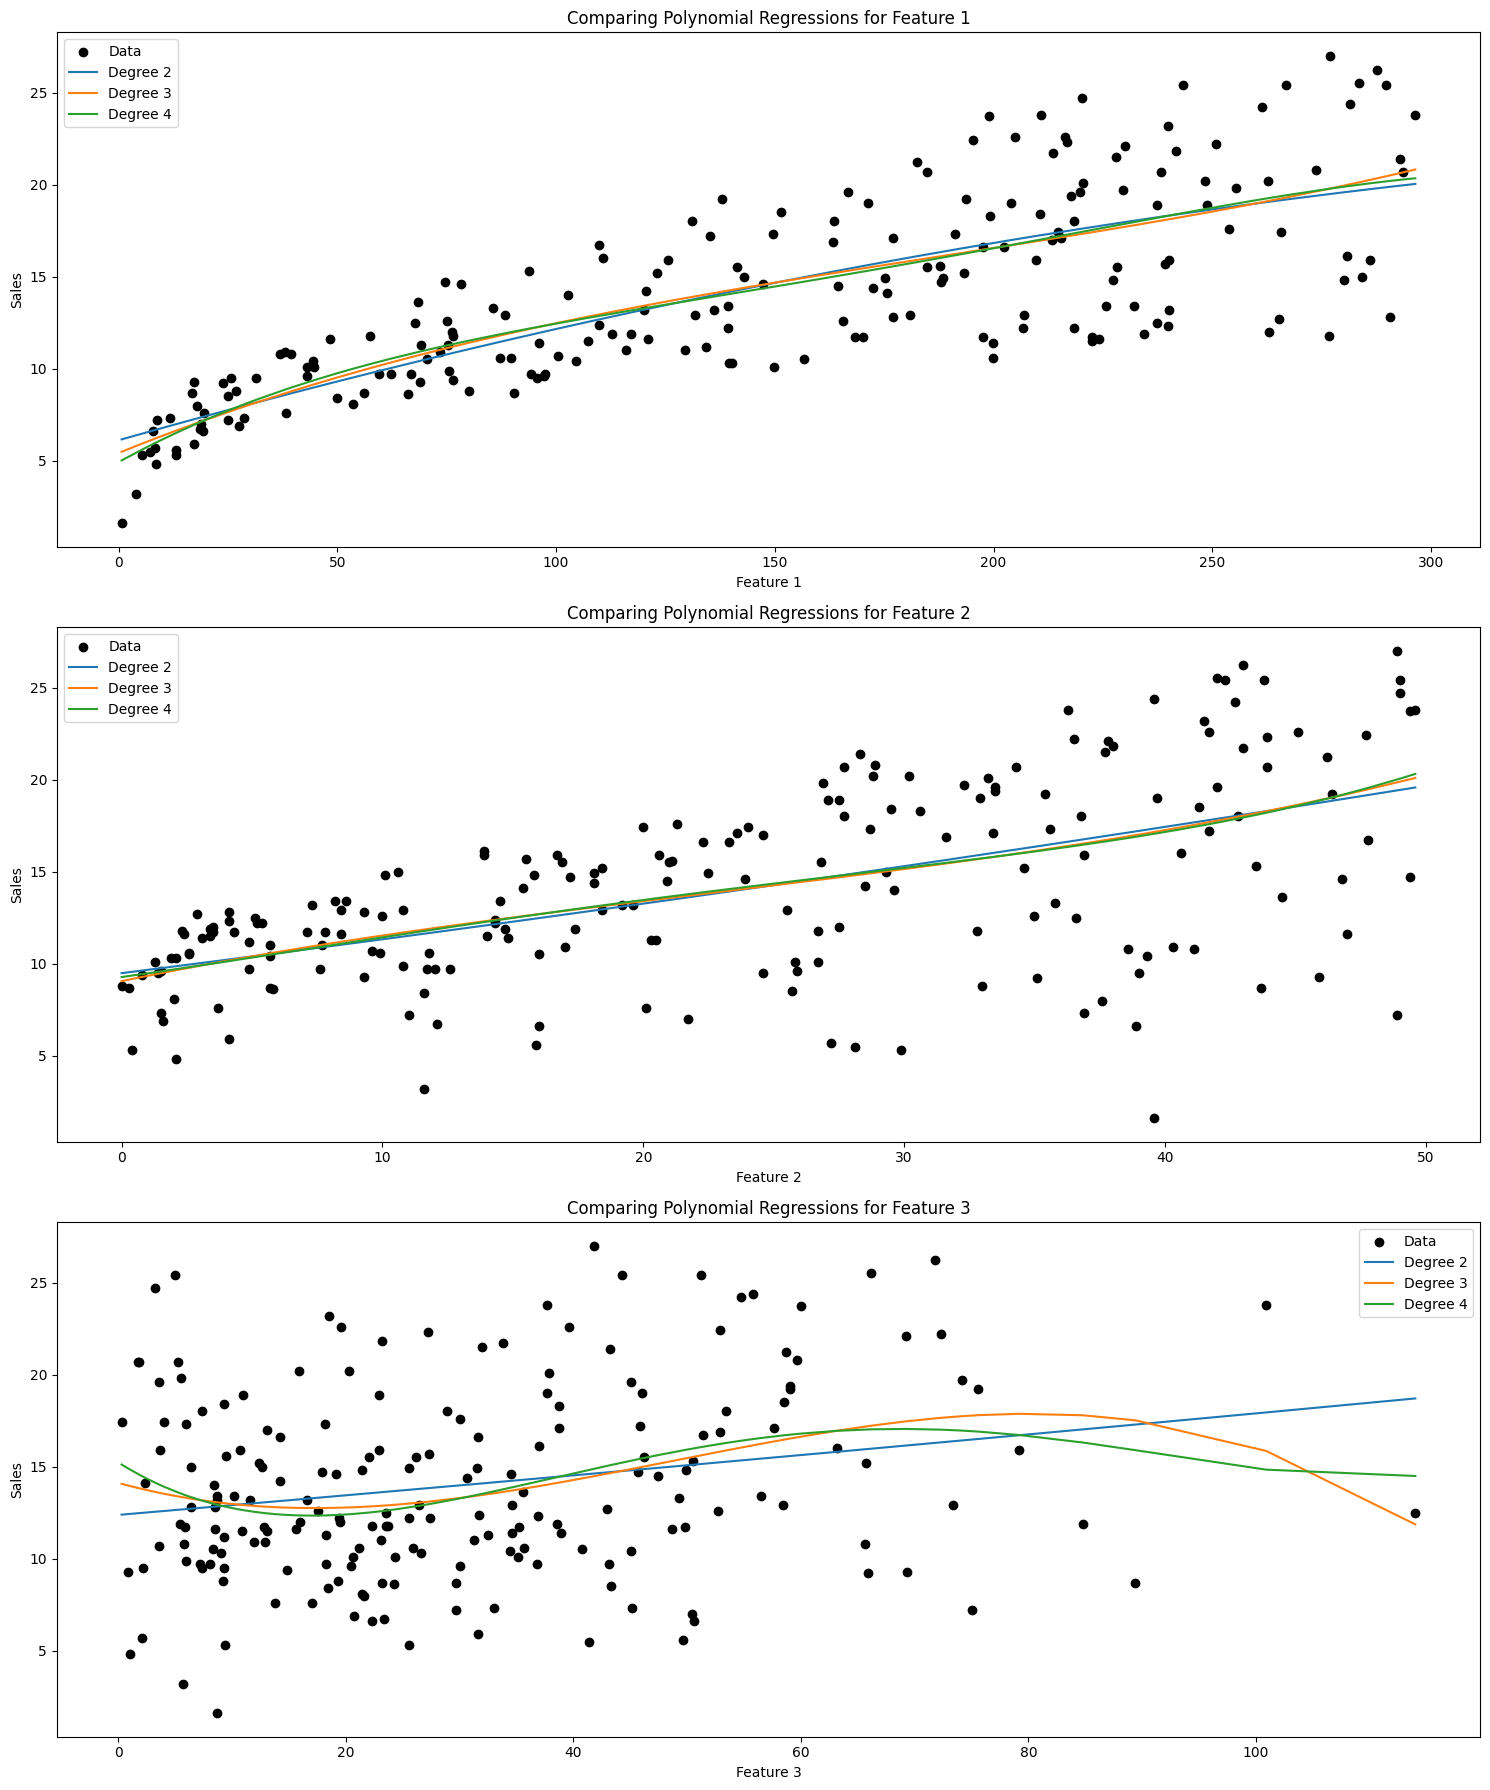

In [11]:
X_features = df[['TV', 'radio', 'newspaper']].values
y = df['sales'].values.reshape(-1, 1)

degrees = [2, 3, 4]
num_features = X_features.shape[1]

plt.figure(figsize=(15, 6 * num_features))

for i in range(num_features):
    X_feature = X_features[:, i].reshape(-1, 1)

    plt.subplot(num_features, 1, i + 1)
    plt.scatter(X_feature, y, color='black', label='Data')

    for degree in degrees:
        polynomial_converter = PolynomialFeatures(degree=degree, include_bias=False)
        X_feature_poly = polynomial_converter.fit_transform(X_feature)

        model = LinearRegression()
        model.fit(X_feature_poly, y)
        y_poly_pred = model.predict(X_feature_poly)

        
        sorted_zip = sorted(zip(X_feature, y_poly_pred))
        X_feature_sorted, y_poly_pred_sorted = zip(*sorted_zip)

        plt.plot(X_feature_sorted, y_poly_pred_sorted, label=f'Degree {degree}')

    plt.xlabel(f'Feature {i+1}')
    plt.ylabel('Sales')
    plt.title(f'Comparing Polynomial Regressions for Feature {i+1}')
    plt.legend()

plt.tight_layout()
plt.show()

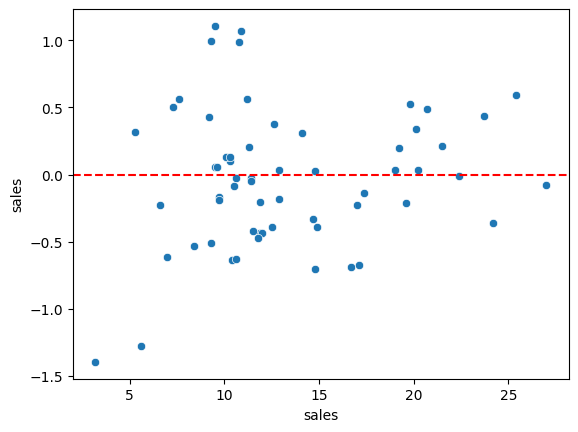

In [12]:
residual_error = y_test - y_pred

sns.scatterplot(x = y_test , y = residual_error)

plt.axhline(y=0 , color = "red" , linestyle = "--")